In [1]:
#imports from modules

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np

import matplotlib.pyplot as plt
import os

import seaborn as sns
import geopandas as gp
from math import sqrt
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor

In [2]:
df = pd.read_csv('mfsnowcrab.csv')

In [3]:
df.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258


In [4]:
crab_loc = pd.DataFrame({'id': df.id})


In [5]:
crab_loc['latitude']  = df['latitude']

In [6]:
crab_loc['longitude'] = df['longitude']

In [35]:
crab_loc.head(100)

,id,latitude,longitude,geometry
0,147038,57.00000,-166.45000,POINT (-166.45000 57.00000)
1,147037,57.00000,-167.08333,POINT (-167.08333 57.00000)
2,147036,57.00000,-167.68333,POINT (-167.68333 57.00000)
3,147035,56.66667,-172.56667,POINT (-172.56667 56.66667)
4,147034,56.66667,-171.96667,POINT (-171.96667 56.66667)
5,147033,56.66667,-171.33333,POINT (-171.33333 56.66667)
6,147032,56.66667,-170.73333,POINT (-170.73333 56.66667)
7,147004,56.35000,-165.23333,POINT (-165.23333 56.35000)
8,147027,56.68333,-161.00000,POINT (-161.00000 56.68333)
9,147026,56.66667,-161.65000,POINT (-161.65000 56.66667)


In [8]:
gdf = gp.GeoDataFrame(crab_loc, geometry = gp.points_from_xy(crab_loc.longitude,
                                                                          crab_loc.latitude))

In [9]:
gdf.head()

,id,latitude,longitude,geometry
0,147038,57.00000,-166.45000,POINT (-166.45000 57.00000)
1,147037,57.00000,-167.08333,POINT (-167.08333 57.00000)
2,147036,57.00000,-167.68333,POINT (-167.68333 57.00000)
3,147035,56.66667,-172.56667,POINT (-172.56667 56.66667)
4,147034,56.66667,-171.96667,POINT (-171.96667 56.66667)


In [10]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.head(500)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.725..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982, 37.69869 -3.09699, 37.76690 -3.67712, ..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948, -8.68440 27.39574, -8.68729 25.88106, ..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.00000 49.00000, -117.03121 49.00000, -116.04..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888, 19.59604 46.17173, 20.22019 46.12747, ..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009, 19.73805 42.68825, 19.30449 42.19575, ..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787, 20.28375 42.32026, 20.07070 42.58863, ..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.89000, -60.89500 10.85500, -60.93500 10.110..."


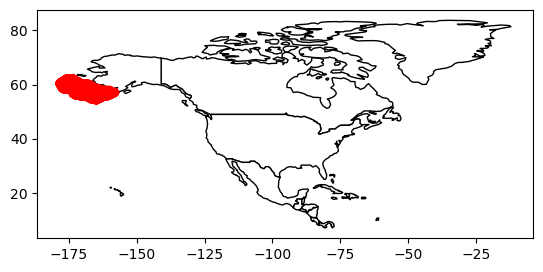

In [11]:
ax = world[world.continent == 'North America'].plot(color = 'white', edgecolor = 'black')
gdf.plot(ax = ax, color = 'red')
plt.show()



In [12]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.725..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982, 37.69869 -3.09699, 37.76690 -3.67712, ..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948, -8.68440 27.39574, -8.68729 25.88106, ..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.00000 49.00000, -117.03121 49.00000, -116.04..."


In [13]:
usa_data = gp.read_file(r'USA_adm2.shx')
  
usa_data.shape

(3148, 1)

In [14]:
adm2 = pd.read_csv('USA_adm2.csv')

In [15]:
adm2.shape

(3148, 12)

In [16]:
adm2['geometry'] = usa_data

In [17]:
adm2.head()

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,1,244,USA,United States,1,Alabama,1,Autauga,County,County,NaN,NaN,"POLYGON ((-86.81896209716791 32.34027099609386, -86.81083679199219 32.34712982177746, ..."
1,2,244,USA,United States,1,Alabama,2,Baldwin,County,County,NaN,NaN,"(POLYGON ((-87.51055908203125 30.3397216796875, -87.51083374023438 30.33944511413586, ..."
2,3,244,USA,United States,1,Alabama,3,Barbour,County,County,NaN,NaN,"POLYGON ((-85.13025665283203 31.76386070251476, -85.13504028320312 31.76803016662598, ..."
3,4,244,USA,United States,1,Alabama,4,Bibb,County,County,NaN,NaN,"POLYGON ((-87.42078399658203 32.87446212768566, -87.42028045654291 32.97188949584972, ..."
4,5,244,USA,United States,1,Alabama,5,Blount,County,County,NaN,NaN,"POLYGON ((-86.95321655273438 33.81542205810558, -86.95449066162104 33.84542083740234, ..."


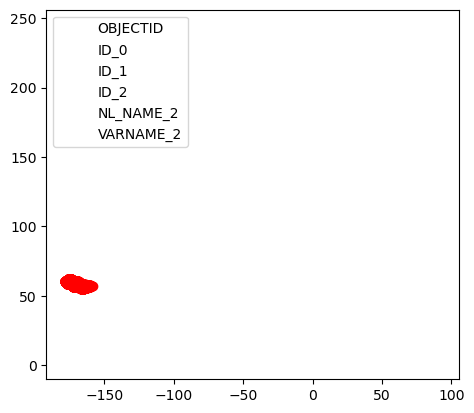

In [18]:
ax = adm2[adm2.NAME_1 == 'Alaska'].plot(color = 'white')
gdf.plot(ax = ax, color = 'red')
plt.show()


In [19]:
coast_data = gp.read_file(r'ne_10m_coastline.shp')
coast_data

,geometry
0,"LINESTRING (59.91603 -67.40049, 59.67856 -67.39414, 59.65748 -67.39723, 59.64625 -67.4..."
1,"LINESTRING (-51.73062 -82.06260, -52.18688 -82.11150, -52.64314 -82.16041, -52.93403 -..."
2,"LINESTRING (166.13697 -50.86435, 166.10711 -50.85231, 166.09588 -50.85125, 166.08961 -..."
3,"LINESTRING (-56.66832 -36.73642, -56.66487 -36.85101, -56.66885 -36.89422, -56.68643 -..."
4,"LINESTRING (-51.07939 3.49209, -51.09648 3.44902, -51.09274 3.37633, -51.03600 3.22921..."
...,...
4128,"LINESTRING (83.30511 70.80551, 83.37164 70.78828, 83.46941 70.73773, 83.44388 70.69131..."
4129,"LINESTRING (97.64568 76.75621, 97.64601 76.75381, 97.64796 76.74860, 97.63860 76.74132..."
4130,"LINESTRING (89.04713 77.14089, 89.13590 77.12711, 89.09858 77.09860, 89.04494 77.07709..."
4131,"LINESTRING (-66.77562 80.59858, -66.79027 80.59858, -66.80049 80.59947, -66.81041 80.6..."


In [20]:
marine = pd.read_csv('ne_10m_geography_marine_polys.dbf.csv')

In [21]:
marine.head()

,featurecla,name,namealt,changed,note,name_fr,min_label,max_label,scalerank,label,...,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,oceanbasin,subbasin
0,bay,Bay of Bengal,NaN,Version 5.2,NaN,golfe du Bengale,2.0,7.5,1,Bay of Bengal,...,vß╗ïnh Bengal,σ¡ƒσèáµïëτüú,1159115253,╪«┘ä█î╪¼ ╪¿┘å┌»╪º┘ä,╫₧╫ñ╫¿╫Ñ ╫æ╫á╫Æ╫£,╨æ╨╡╨╜╨│╨░╨╗╤î╤ü╤î╨║╨░ ╨╖╨░╤é╨╛╨║╨░,╪«┘ä█î╪¼ ╪¿┘å┌»╪º┘ä,σ¡ƒσèáµïëτüú,Indian Ocean,Bay of Bengal
1,sea,Beaufort Sea,NaN,Version 5.2,NaN,mer de Beaufort,2.0,7.5,1,Beaufort Sea,...,Biß╗ân Beaufort,µ│óσ╝ùτë╣µ╡╖,1159115359,╪»╪▒█î╪º█î ╪¿┘ê┘ü┘ê╪▒╪¬,╫Ö╫¥ ╫æ╫ò╫ñ╫ò╫¿,╨£╨╛╤Ç╨╡ ╨æ╨╛╤ä╨╛╤Ç╤é╨░,╪¿╪¡█î╪▒█ü ╪¿█î┘ê┘ü┘ê╪▒╪¬,µ│óσ╝ùτë╣µ╡╖,Arctic Ocean,Beaufort Sea
2,gulf,Gulf of Mexico,NaN,Version 5.2,NaN,golfe du Mexique,2.0,7.5,1,Gulf of Mexico,...,vß╗ïnh M├⌐xico,σó¿ΦÑ┐σôÑµ╣╛,1159115399,╪«┘ä█î╪¼ ┘à┌⌐╪▓█î┌⌐,╫₧╫ñ╫¿╫Ñ ╫₧╫º╫í╫Ö╫º╫ò,╨£╨╡╨║╤ü╨╕╨║╨░╨╜╤ü╤î╨║╨░ ╨╖╨░╤é╨╛╨║╨░,╪«┘ä█î╪¼ ┘à█î┌⌐╪│█î┌⌐┘ê,σó¿ΦÑ┐σôÑτüú,North Atlantic Ocean,Gulf of Mexico
3,sea,Labrador Sea,NaN,Version 5.2,NaN,mer du Labrador,2.0,7.5,1,Labrador Sea,...,Biß╗ân Labrador,µïëσ╕âµïëσñÜµ╡╖,1159115419,╪»╪▒█î╪º█î ┘ä╪º╪¿╪▒╪º╪»┘ê╪▒,╫Ö╫¥ ╫£╫æ╫¿╫ô╫ò╫¿,╨£╨╛╤Ç╨╡ ╨¢╨░╨▒╤Ç╨░╨┤╨╛╤Ç,╪¿╪¡█î╪▒█ü ┘ä█î╪¿╪▒╪º┌ê╪º╪▒,µïëσ╕âµïëσñÜµ╡╖,North Atlantic Ocean,Labrador Sea
4,sea,Caspian Sea,NaN,Version 5.2,NaN,mer Caspienne,2.0,7.5,1,Caspian Sea,...,Biß╗ân Caspi,ΦúÅµ╡╖,1159115461,╪»╪▒█î╪º█î ┘à╪º╪▓┘å╪»╪▒╪º┘å,╫ö╫Ö╫¥ ╫ö╫¢╫í╫ñ╫Ö,╨Ü╨░╤ü╨┐╤û╨╣╤ü╤î╨║╨╡ ╨╝╨╛╤Ç╨╡,╪¿╪¡█î╪▒█ü ┘é╪▓┘ê█î┘å,ΦúÅµ╡╖,Caspian Sea,Caspian Sea


In [22]:
marine_coords = gp.read_file(r'ne_10m_geography_marine_polys.shx')
marine_coords.head()

,geometry
0,"POLYGON ((95.22419 5.52191, 95.19985 5.52403, 81.87441 7.24170, 81.87385 7.28826, 81.8..."
1,"POLYGON ((-156.41148 71.39944, -122.51200 76.37518, -122.50564 76.35829, -122.51942 76..."
2,"POLYGON ((-84.88455 21.86735, -84.88719 21.86786, -87.01657 21.57313, -87.03455 21.592..."
3,"POLYGON ((-64.28356 60.06416, -44.61337 60.01654, -44.53294 60.02977, -44.47632 60.095..."
4,"POLYGON ((52.85014 41.20043, 52.90145 41.10044, 52.92001 41.08191, 52.94326 41.03799, ..."


In [23]:
marine['geometry'] = marine_coords
marine.head(1).T

,0
featurecla,bay
name,Bay of Bengal
namealt,NaN
changed,Version 5.2
note,NaN
name_fr,golfe du Bengale
min_label,2.0
max_label,7.5
scalerank,1
label,Bay of Bengal


In [24]:
marine.drop(columns = ['name_zh','name_fa','name_he', 'name_uk','name_ur','name_zht','name_ru',
                       'name_ar','name_bn','name_de', 'name_en','name_es','name_el','name_hi',
                      'name_hi','name_hu','name_id', 'name_it','name_ja','name_ko'], inplace = True)

In [25]:
marine.head(1).T

,0
featurecla,bay
name,Bay of Bengal
namealt,NaN
changed,Version 5.2
note,NaN
name_fr,golfe du Bengale
min_label,2.0
max_label,7.5
scalerank,1
label,Bay of Bengal


In [26]:
marine.drop(columns = ['name_nl','name_pl','name_pt','name_sv','name_tr','name_vi'], inplace = True)

In [27]:
marine.head()

,featurecla,name,namealt,changed,note,name_fr,min_label,max_label,scalerank,label,wikidataid,ne_id,oceanbasin,subbasin,geometry
0,bay,Bay of Bengal,NaN,Version 5.2,NaN,golfe du Bengale,2.0,7.5,1,Bay of Bengal,Q38684,1159115253,Indian Ocean,Bay of Bengal,"POLYGON ((95.22419314980451 5.52191132244657, 95.19985355019506 5.524030056170588, 81...."
1,sea,Beaufort Sea,NaN,Version 5.2,NaN,mer de Beaufort,2.0,7.5,1,Beaufort Sea,Q131274,1159115359,Arctic Ocean,Beaufort Sea,"POLYGON ((-156.4114808827776 71.39944061958509, -122.5119996814702 76.37518341745651, ..."
2,gulf,Gulf of Mexico,NaN,Version 5.2,NaN,golfe du Mexique,2.0,7.5,1,Gulf of Mexico,Q12630,1159115399,North Atlantic Ocean,Gulf of Mexico,"POLYGON ((-84.88455481641071 21.86734772387909, -84.88719031445763 21.86786448820216, ..."
3,sea,Labrador Sea,NaN,Version 5.2,NaN,mer du Labrador,2.0,7.5,1,Labrador Sea,Q184189,1159115419,North Atlantic Ocean,Labrador Sea,"POLYGON ((-64.28356421574242 60.06416351993035, -44.61336951351521 60.01654368757336, ..."
4,sea,Caspian Sea,NaN,Version 5.2,NaN,mer Caspienne,2.0,7.5,1,Caspian Sea,Q5484,1159115461,Caspian Sea,Caspian Sea,"POLYGON ((52.85013878765594 41.20043122005016, 52.90145348492169 41.10043732356543, 52..."


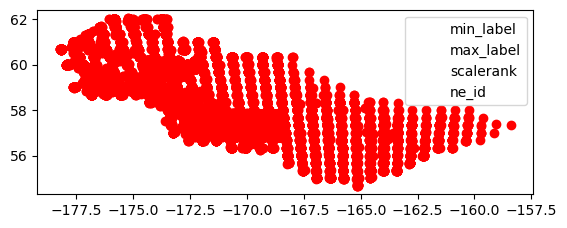

In [34]:
ax = marine[marine.name == 'Arctic Sea'].plot(color = 'white')
gdf.plot(ax = ax, color = 'red')
plt.show()